In [1]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Reading the data
loan_data = pd.read_csv("loan.csv")

In [3]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan_data.shape

(39717, 111)

## DATA CLEANING

In [5]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### Remove the null values

In [6]:
loan_data.dropna(axis = 1, how = 'all' , inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### Some of the columns are single values, Those values did not contribute to the analysis.

#### That single column values are: 
#### acc_now_delinq: The number of accounts on which the borrower is now delinquent.
#### application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers
#### collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections
#### delinq_amnt:The past-due amount owed for the accounts on which the borrower is now delinquent.
#### initial_list_status: The initial listing status of the loan. Possible values are – W, F
#### pymnt_plan: Indicates if a payment plan has been put in place for the loan
#### policy_code: "publicly available policy_code=1 and new products not publicly available policy_code=2"
#### pub_rec_bankruptcies: Number of public record bankruptcies
#### tax_liens:Number of tax liens.

In [7]:
loan_data.drop(['acc_now_delinq' , 'application_type' , 'collections_12_mths_ex_med' , 'delinq_amnt' , 'initial_list_status' , 'pymnt_plan' , 'policy_code' , 'pub_rec_bankruptcies', 'tax_liens'], axis = 1 , inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


#### Some of the columns are need for post approval of loan. But in this analysis we don't need those values/variables. Because in this analysis the main objective is find out charged off/defaulters 
#### So first recognize those columns we don't need i.e..  id: A unique LC assigned ID for the loan listing,          member_id: A unique LC assigned Id for the borrower member,            url:URL for the LC page with listing data,               title: The loan title provided by the borrower, emp_title: The job title supplied by the Borrower when applying for the loan,                zip_code:The first 3 numbers of the zip code provided by the borrower in the loan application,                last_credit_pull_d: The most recent month LC pulled credit for this loan,                  addr_state: The state provided by the borrower in the loan application,            delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years,           revol_bal: Total credit revolving balance, out_prncp: Remaining outstanding principal for total amount funded,              total_pymnt: Payments received to date for total amount funded,                total_rec_int: Interest received to date,                      total_rec_late_fee: Late fees received to date,              total_rec_prncp: Principal received to date,                                recoveries: post charge off gross recovery,                 collection_recovery_fee: post charge off collection fee,                        last_pymnt_d: Last month payment was received, last_pymnt_amnt: Last total payment amount received,                     next_pymnt_d: Next scheduled payment date, chargeoff_within_12_mths: Number of charge-offs within 12 months,                                          mths_since_last_delinq: The number of months since the borrower's last delinquency,                                        mths_since_last_record: The number of months since the last public record.

In [8]:
loan_data.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)
loan_data.shape

(39717, 21)

In [9]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

In [10]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


#### We mainly focus on the column of loan_status. In that column we focus on charged-off and fully paid, we can't do analysis of current loan_status
#### Exclude the data of current in the column of loan_status

In [11]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

#### Check the missing values

In [12]:
round(100*(loan_data.isna().sum()/len(loan_data.index)), 2)

loan_amnt              0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             2.68
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
dti                    0.00
earliest_cr_line       0.00
inq_last_6mths         0.00
open_acc               0.00
pub_rec                0.00
revol_util             0.13
total_acc              0.00
dtype: float64

#### columns with missing values are "emp_length", "revol_util". So first to check the what kind of data each column has.

In [86]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

#### Check the data.  Then we found that very low percentage of missing values, so use the mode value in emp_length column and sum in revol_util column. Imputing this values very low affect the analysis.

In [13]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()

0

In [14]:
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_data.revol_util.isna().sum()

0

#### Standardizing the data i.e.., revol_util column is to continuous values, int_rate column, emp_length < 1 year is assumed as 0 and 10+ years is assumed as 10, and 'term' is categorical variable.

In [15]:
loan_data.revol_util = pd.to_numeric(loan_data.revol_util.apply(lambda x : x.split('%')[0]))

In [16]:
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))

In [17]:
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [18]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


In [19]:
loan_data.describe()

,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
count,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000,3.852700e+04,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000
mean,11055.265139,10230.940095,11.927378,322.678650,5.078594,6.880923e+04,13.276353,0.871752,9.281413,0.055442,48.702777,22.067615
std,7348.433587,7022.678989,3.690161,208.649278,3.603060,6.421493e+04,6.671392,1.071756,4.400158,0.237853,28.364741,11.422526
min,500.000000,0.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
25%,5325.000000,5000.000000,8.940000,165.740000,2.000000,4.000000e+04,8.140000,0.000000,6.000000,0.000000,25.200000,13.000000
50%,9600.000000,8750.000000,11.710000,278.150000,4.000000,5.900000e+04,13.370000,1.000000,9.000000,0.000000,49.100000,20.000000
75%,15000.000000,14000.000000,14.350000,425.860000,9.000000,8.200000e+04,18.560000,1.000000,12.000000,0.000000,72.300000,29.000000
max,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,99.900000,90.000000


#### Percentage of loans paid vs charged off

In [20]:
loan_status_percent = loan_data['loan_status'].value_counts(normalize = True)
loan_status_percent

Fully Paid     0.854362
Charged Off    0.145638
Name: loan_status, dtype: float64

## Univariate Analysis
#### loan_amnt

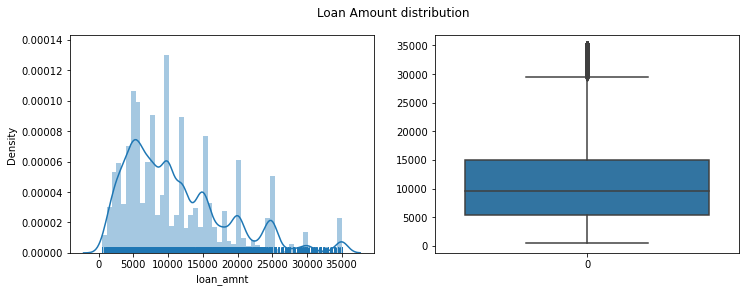

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_data.loan_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_data.loan_amnt)
plt.suptitle('Loan Amount distribution')
plt.show()

In [22]:
loan_data.loan_amnt.describe()

count    38527.000000
mean     11055.265139
std       7348.433587
min        500.000000
25%       5325.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [23]:
loan_data.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38527.000000
mean     11055.265139
std       7348.433587
min        500.000000
5%        2400.000000
10%       3125.000000
25%       5325.000000
50%       9600.000000
75%      15000.000000
90%      21600.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#### Median distribution of loan amount is 9600. And very  few peple take the loan above 30000.

#### funded_amnt_inv

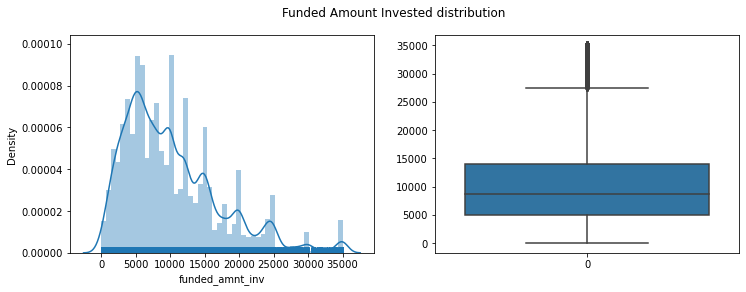

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_data.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_data.funded_amnt_inv)
plt.suptitle('Funded Amount Invested distribution')
plt.show()

In [25]:
loan_data.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38527.000000
mean     10230.940095
std       7022.678989
min          0.000000
5%        1800.000000
10%       2850.000000
25%       5000.000000
50%       8750.000000
75%      14000.000000
90%      19975.000000
95%      24506.582238
99%      34721.583150
max      35000.000000
Name: funded_amnt_inv, dtype: float64

#### funded_amnt_inv is behaves like loan_amnt. lending club approved almost loan_amnt to the borrowers.

#### int_rate

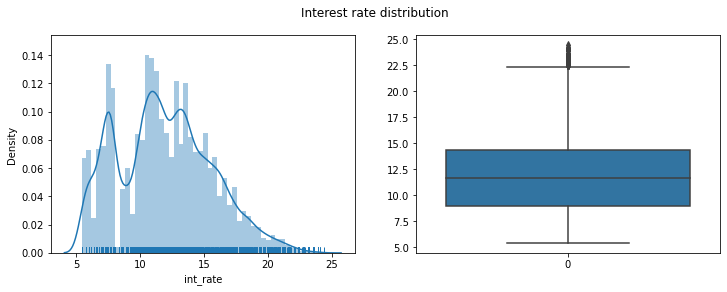

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_data.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_data.int_rate)
plt.suptitle('Interest rate distribution')
plt.show()

In [27]:
loan_data.int_rate.describe()

count    38527.000000
mean        11.927378
std          3.690161
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

####  Most of the int_rate lies between 9% to 14.5%. Few people took loan at higher int_rate i.e., 22.5%

#### annual_inc

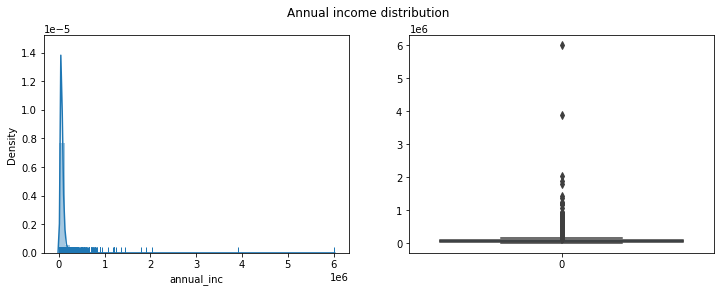

In [28]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_data.annual_inc, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_data.annual_inc)
plt.suptitle('Annual income distribution')
plt.show()

In [29]:
quantile_info = loan_data.annual_inc.quantile([0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])
quantile_info

0.05     24000.0
0.10     30000.0
0.25     40000.0
0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.99    234000.0
Name: annual_inc, dtype: float64

#### Very few peoples annual_inc is above 235000. Maximum(99%) borrowers annual_inc is below 235000.

#### dti

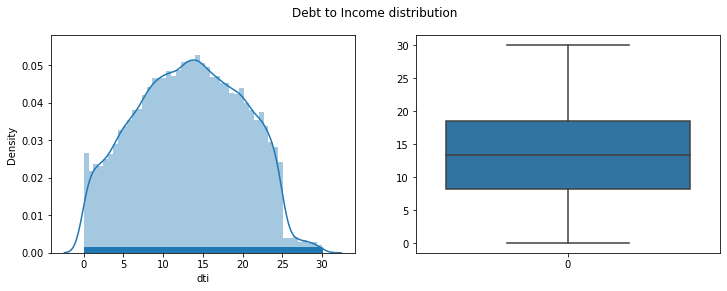

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_data.dti, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_data.dti)
plt.suptitle('Debt to Income distribution')
plt.show()

####  All the loans are given to barrower's who have Debt to Income ration less than 30.

#### pub_rec

Text(0.5, 1.0, 'pub_rec Distribution')

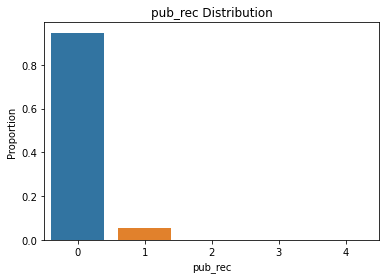

In [31]:
prob_df = loan_data['pub_rec'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='pub_rec', data=prob_df)
plt.xlabel('pub_rec')
plt.ylabel('Proportion')
plt.title('pub_rec'+' Distribution')

#### 99% people have not went bankrupt.

#### loan_status

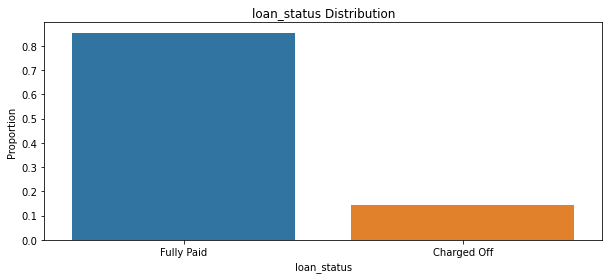

In [32]:
plt.figure(figsize=(10,4))
prob_df = loan_data['loan_status'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='loan_status', data=prob_df)
plt.xlabel('loan_status')
plt.ylabel('Proportion')
plt.title('loan_status'+' Distribution')
plt.show()

#### Above 85% of th borrowers are fully paid. Only 15 to 14% of the borrowers are charged-off

#### issue_d

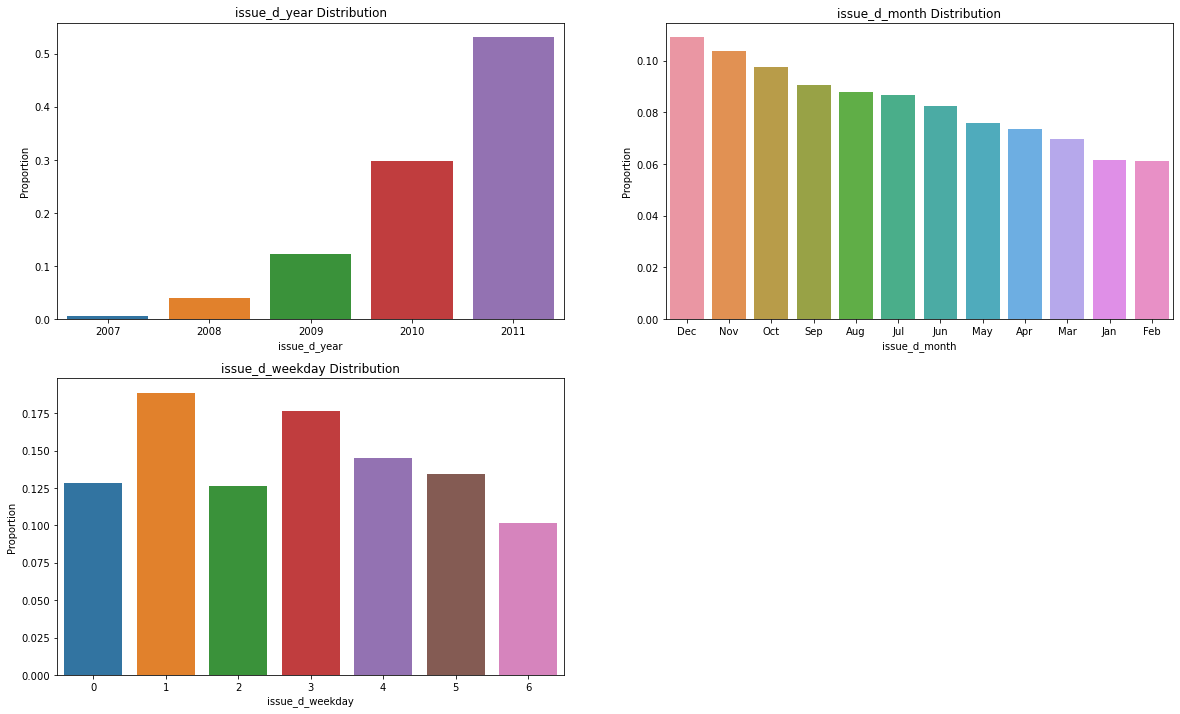

In [33]:
loan_data['issue_d'] = pd.to_datetime(loan_data.issue_d, format='%b-%y')
loan_data['issue_d'] = loan_data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

loan_data['issue_d_year'] = loan_data.issue_d.dt.year
loan_data['issue_d_month'] = loan_data.issue_d.dt.strftime('%b')
loan_data['issue_d_weekday'] = loan_data.issue_d.dt.weekday

prob_df = loan_data['issue_d_year'].value_counts(normalize=True).reset_index()
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(x='index', y='issue_d_year', data=prob_df)
plt.xlabel('issue_d_year')
plt.ylabel('Proportion')
plt.title('issue_d_year'+' Distribution')

prob_df = loan_data['issue_d_month'].value_counts(normalize=True).reset_index()
plt.subplot(2,2,2)
sns.barplot(x='index', y='issue_d_month', data=prob_df)
plt.xlabel('issue_d_month')
plt.ylabel('Proportion')
plt.title('issue_d_month'+' Distribution')

prob_df = loan_data['issue_d_weekday'].value_counts(normalize=True).reset_index()
plt.subplot(2,2,3)
sns.barplot(x='index', y='issue_d_weekday', data=prob_df)
plt.xlabel('issue_d_weekday')
plt.ylabel('Proportion')
plt.title('issue_d_weekday'+' Distribution')

plt.show()

#### Doubling loan issues every year.
#### Last 3 months every end of the Year i.e., Oct, Nov and Dec loan approvals are increased.
#### Issued more loans on tuesday and wednessday than other week days.

#### earliest_cr_line

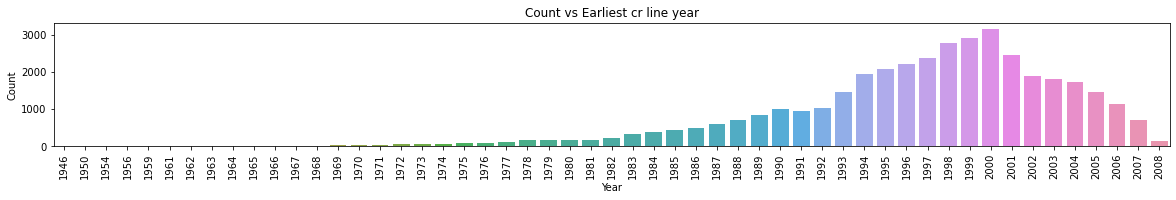

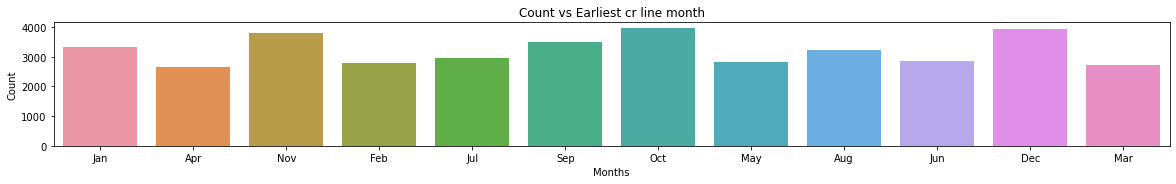

In [34]:
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data.earliest_cr_line, format='%b-%y')
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

loan_data['earliest_cr_line_year'] = loan_data.earliest_cr_line.dt.year
loan_data['earliest_cr_line_month'] = loan_data.earliest_cr_line.dt.strftime('%b')
loan_data['earliest_cr_line_year'] = loan_data['earliest_cr_line_year'].astype(object)

plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
sns.countplot(loan_data.earliest_cr_line_year)
plt.title('Count vs Earliest cr line year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.figure(figsize=(20,5))
plt.subplot(2,1,2)
sns.countplot(loan_data.earliest_cr_line_month)
plt.title('Count vs Earliest cr line month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

#### Many of borrowers earliest_cr_line in 2000 year and end of the year i.e., Oct, Nov, Dec

#### purpose

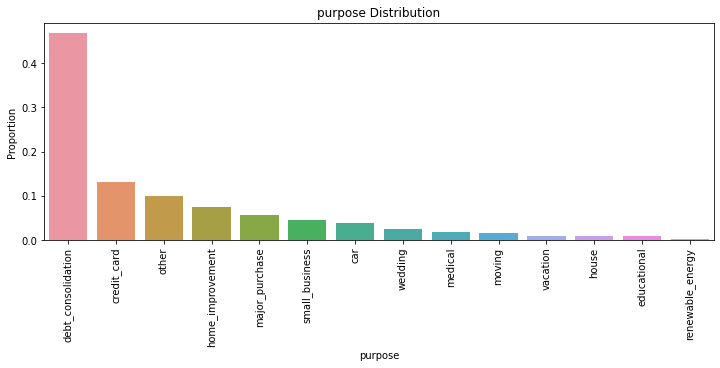

In [35]:
plt.figure(figsize=(12,4))
prob_df = loan_data['purpose'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='purpose', data=prob_df)
plt.xlabel('purpose')
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title('purpose'+' Distribution')
plt.show()

#### Most of the borrowers took the loan for debt consolidation and a very few borrowers took for renewable energy.

#### home_ownership

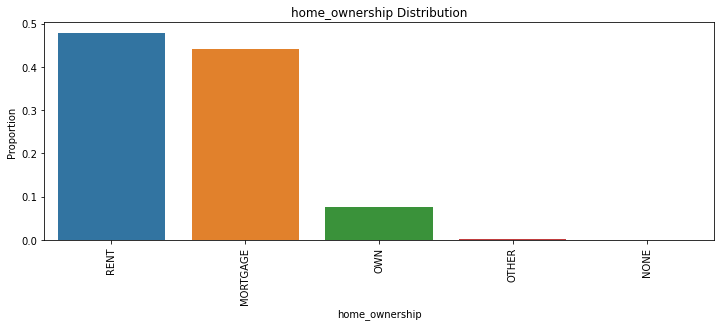

In [36]:
plt.figure(figsize=(12,4))
prob_df = loan_data['home_ownership'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='home_ownership', data=prob_df)
plt.xlabel('home_ownership')
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title('home_ownership'+' Distribution')
plt.show()

In [37]:
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

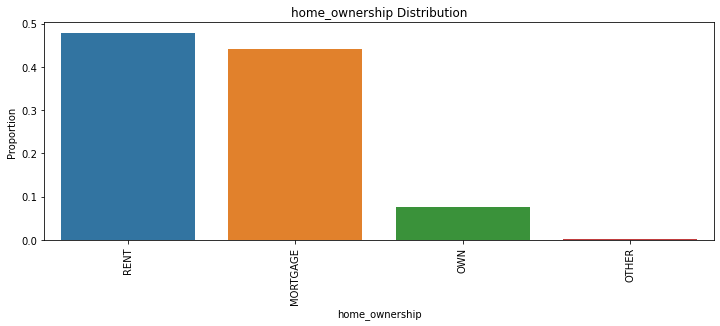

In [38]:
plt.figure(figsize=(12,4))
prob_df = loan_data['home_ownership'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='home_ownership', data=prob_df)
plt.xlabel('home_ownership')
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title('home_ownership'+' Distribution')
plt.show()

####  loan borrowers are mostly having rented and mortgage houses.

#### term

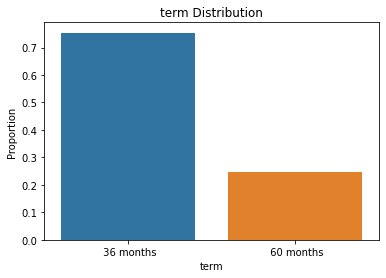

In [39]:
prob_df = loan_data['term'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='term', data=prob_df)
plt.xlabel('term')
plt.ylabel('Proportion')
plt.title('term'+' Distribution')
plt.show()

#### Barrowrs have taken 36 months tenure more than 60 months

#### grade

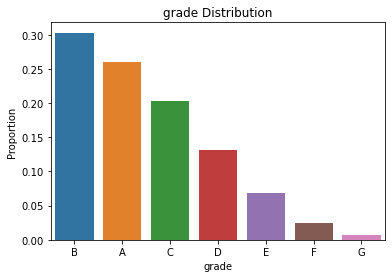

In [40]:
prob_df = loan_data['grade'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='grade', data=prob_df)
plt.xlabel('grade')
plt.ylabel('Proportion')
plt.title('grade'+' Distribution')
plt.show()

#### Most borrowers fall under A and B grades then other grades

#### Sub Grade

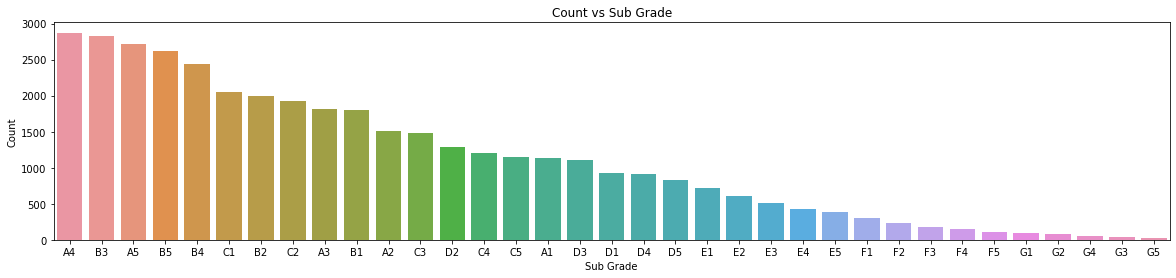

In [41]:
plt.figure(figsize=(20,4))
sns.countplot(loan_data.sub_grade, order=loan_data.sub_grade.value_counts().index)
plt.title('Count vs Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()

#### emp_length

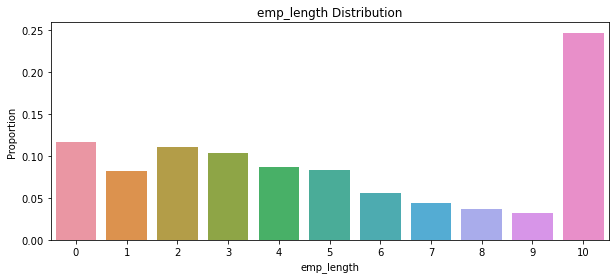

In [42]:
plt.figure(figsize=(10,4))
prob_df = loan_data['emp_length'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='emp_length', data=prob_df)
plt.xlabel('emp_length')
plt.ylabel('Proportion')
plt.title('emp_length'+' Distribution')
plt.show()

#### Borrowers are mostly 10+ years emploment length.

## Segmented Univariate Analysis

#### Loan Amount

<AxesSubplot:title={'center':'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

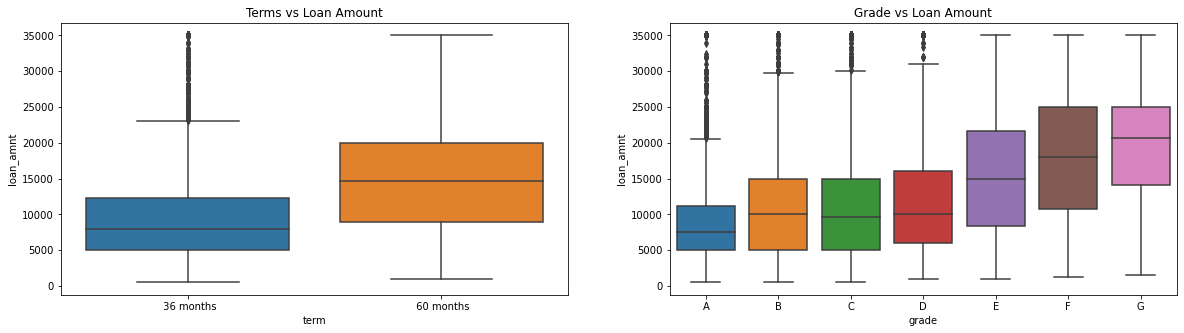

In [43]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_data.loan_amnt, data=loan_data)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_data.loan_amnt, order = grade_ord, data=loan_data)

#### Higher amount loans have high tenure i.e, 60 months. As Grades are decreasing the loan amount is increasing.

<AxesSubplot:title={'center':'verification_status vs Loan Amount'}, xlabel='verification_status', ylabel='loan_amnt'>

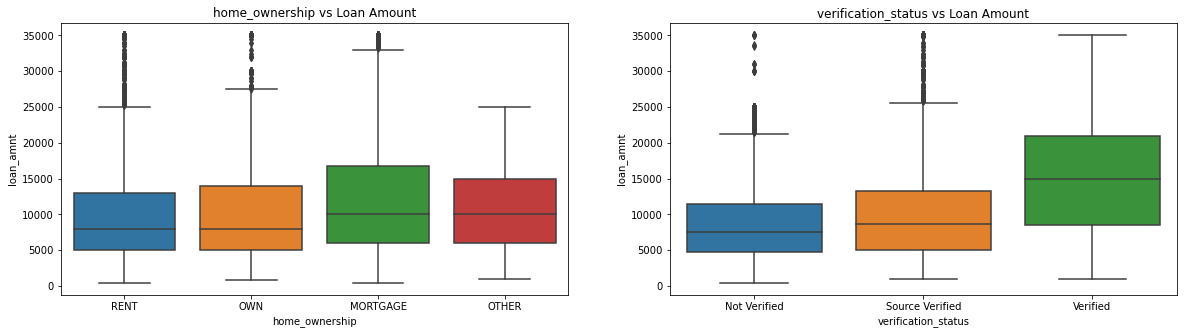

In [44]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan_data.loan_amnt, data=loan_data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = loan_data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_data.loan_amnt, order = verification_status_ord, data=loan_data)

#### More borrowers are from MORTAGE and also the median loan amount also high for MORTAGE owned borrowers.And most of borrowers are verified for borrowing loan >9k

Text(0.5, 1.0, 'loan_status vs Loan Amount')

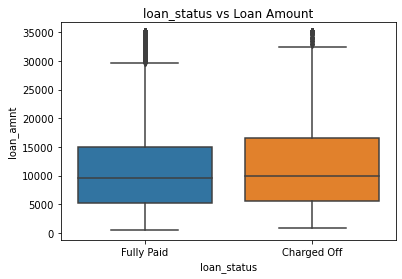

In [45]:
sns.boxplot(x='loan_status', y=loan_data.loan_amnt, data=loan_data)
plt.title('loan_status vs Loan Amount')

#### Charged Off loans have higher amounts than Fully Paid ones.

Text(0.5, 1.0, 'purpose vs Loan Amount')

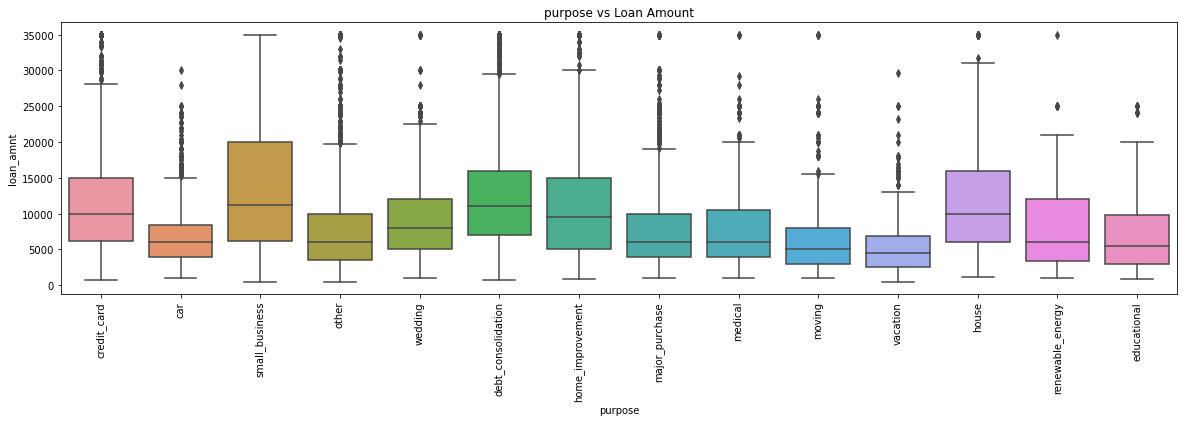

In [46]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_data.loan_amnt, data=loan_data)
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

#### More loan amount is from Small bussiness followed by debt consolidation.

Text(0.5, 1.0, 'emp_length vs Loan Amount')

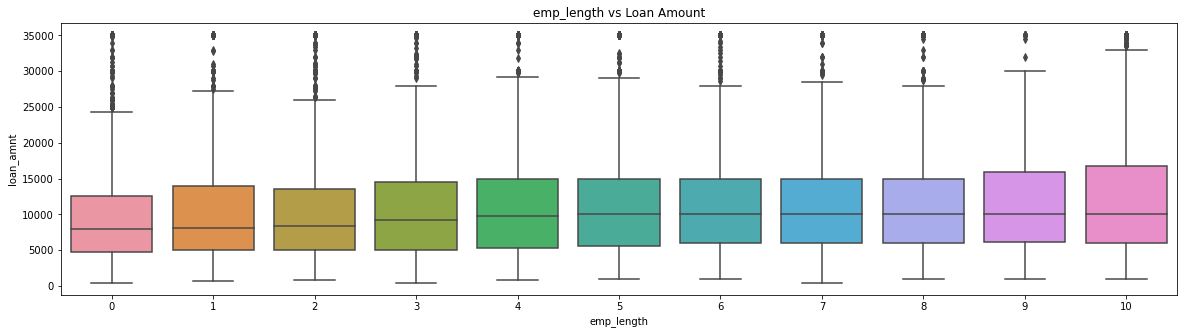

In [47]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_data.loan_amnt, data=loan_data)
plt.title('emp_length vs Loan Amount')

#### more borrowers are from 10+ years and least is <1 year

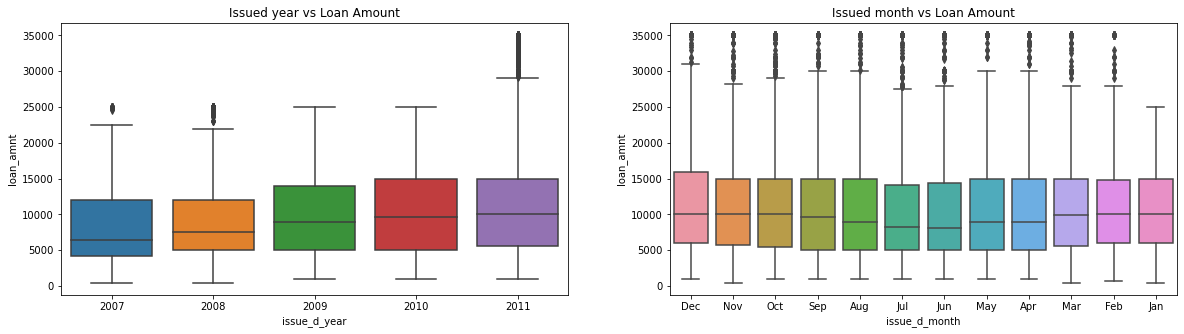

In [48]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan_data.issue_d_year, y=loan_data.loan_amnt, data=loan_data)
plt.title('Issued year vs Loan Amount')
plt.subplot(122)
sns.boxplot(x=loan_data.issue_d_month, y=loan_data.loan_amnt, data=loan_data)
plt.title('Issued month vs Loan Amount')
plt.show()

#### The meadian loan amount in each year did not change much but the distribution is more spread as the years increase,  which means people have taken different loan amounts in each year.    Few Loan borrowers took heigher loan amount in 2008 and 2011 which are plotted as ouliers.      Loan borrowers took almost similar amounts in all the months except in December, people have taken heigher amounts as distribution is high above median.

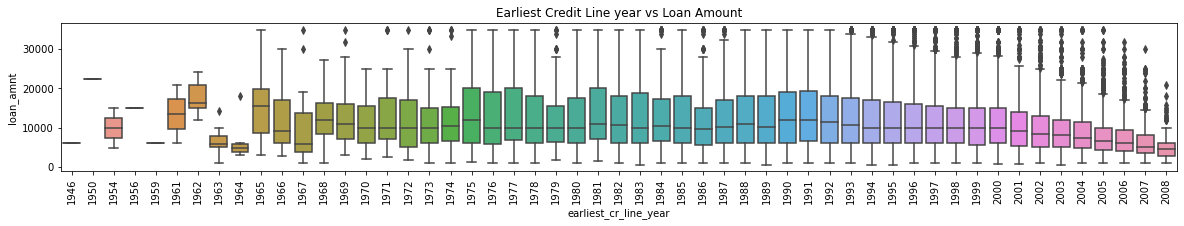

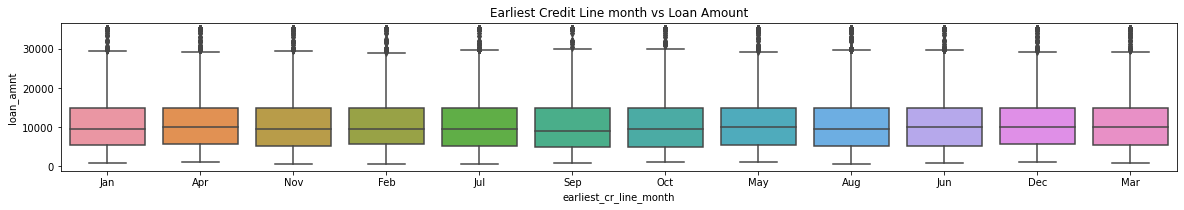

In [49]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=loan_data.earliest_cr_line_year, y=loan_data.loan_amnt, data=loan_data)
plt.xticks(rotation=90)
plt.title('Earliest Credit Line year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=loan_data.earliest_cr_line_month, y=loan_data.loan_amnt, data=loan_data)
plt.title('Earliest Credit Line month vs Loan Amount')
plt.show()

#### Borrowers who go earliest credit line in 1966 got wide spreaded amount of loans than others.

#### funded_amount_inv

<AxesSubplot:title={'center':'Grade vs funded_amount_inv'}, xlabel='grade', ylabel='funded_amnt_inv'>

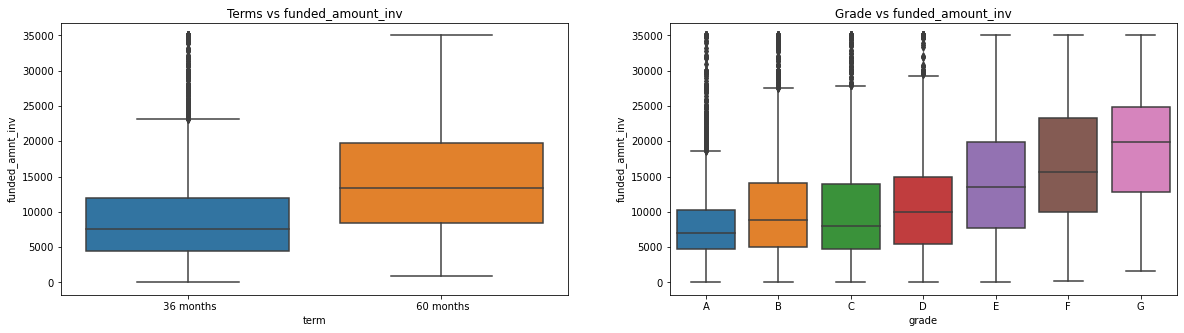

In [50]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_data.funded_amnt_inv, data=loan_data)
plt.title('Terms vs funded_amount_inv')
plt.subplot(122)
plt.title('Grade vs funded_amount_inv')
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_data.funded_amnt_inv, order = grade_ord, data=loan_data)

#### Higher funded_amount_inv have high tenure i.e, 60 months. As Grades are decreasing the funded_amount_inv is increasing.

#### int_rate

<AxesSubplot:title={'center':'Grade vs Interest Rate'}, xlabel='grade', ylabel='int_rate'>

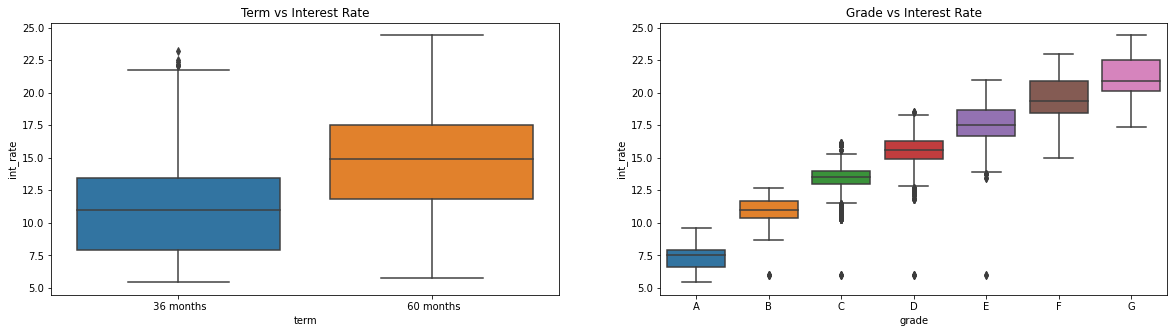

In [51]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_data.int_rate, data=loan_data)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_data.int_rate, order = grade_ord, data=loan_data)

#### The interest rates are higher for Higher tenure loans. And Also Interest Rates are Higher as Grades are Lowering (A to G).

<AxesSubplot:title={'center':'verification_status vs Interest Rate'}, xlabel='verification_status', ylabel='int_rate'>

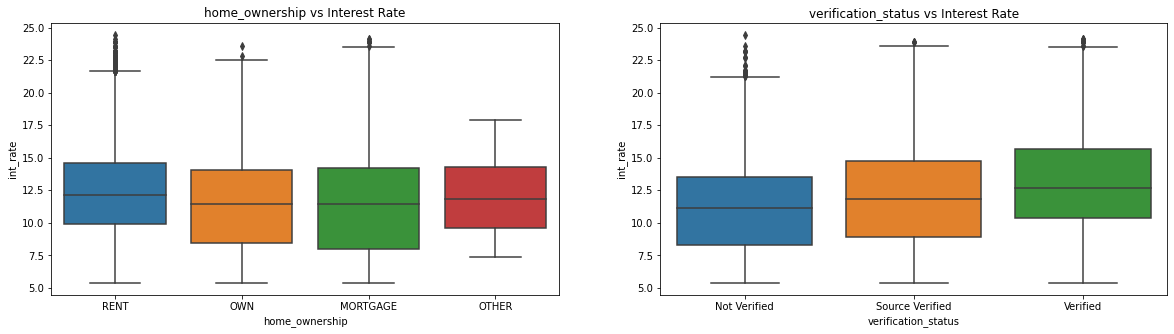

In [52]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan_data.int_rate, data=loan_data)
plt.title('home_ownership vs Interest Rate')
plt.subplot(122)
plt.title('verification_status vs Interest Rate')
verification_status_ord = loan_data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_data.int_rate, order = verification_status_ord, data=loan_data)

#### Barrowers with Own and Mortgage got loans with less interest rates as the security will be there. And The Non Verified Barrowers got less interest rates compared to Verified and Source Verified barrowers.

Text(0.5, 1.0, 'loan_status vs Interest Rate')

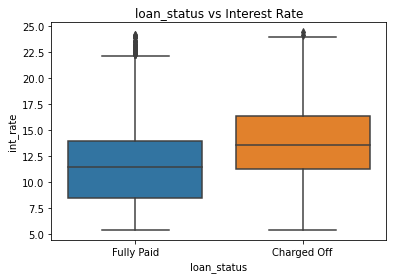

In [53]:
sns.boxplot(x='loan_status', y=loan_data.int_rate, data=loan_data)
plt.title('loan_status vs Interest Rate')

#### his clearly tells us, grater the interest rate more the chance of Defaulting the loan.

Text(0.5, 1.0, 'purpose vs Interest Rate')

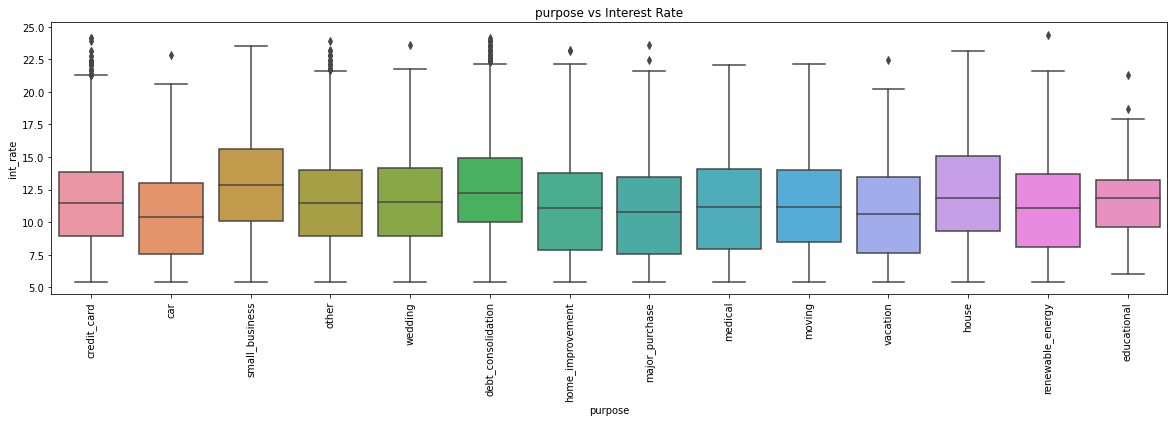

In [54]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_data.int_rate, data=loan_data)
plt.xticks(rotation=90)
plt.title('purpose vs Interest Rate')

#### Small Business, Debt Consolidation and House loans are given with more interest rates comparativesly others.

#### annual_inc

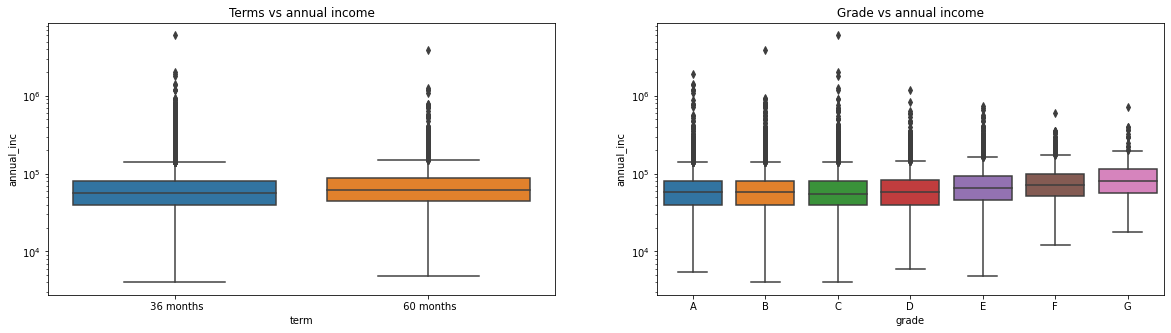

In [55]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_data.annual_inc, data=loan_data)
plt.title('Terms vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income')
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_data.annual_inc, order = grade_ord, data=loan_data)
plt.yscale('log')

#### Comparatively Annual income is higher for lower grades.

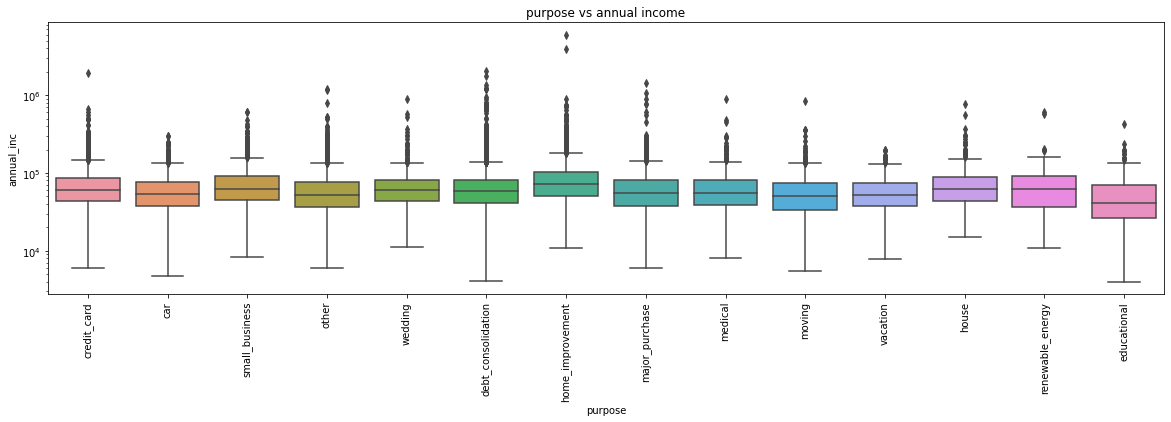

In [56]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_data.annual_inc, data=loan_data)
plt.xticks(rotation=90)
plt.title('purpose vs annual income')
plt.yscale('log')

#### A category belonging to Renewable energy, small business and home improvements have higher annual income provided by the borrower for the loan request.

#### emp_length

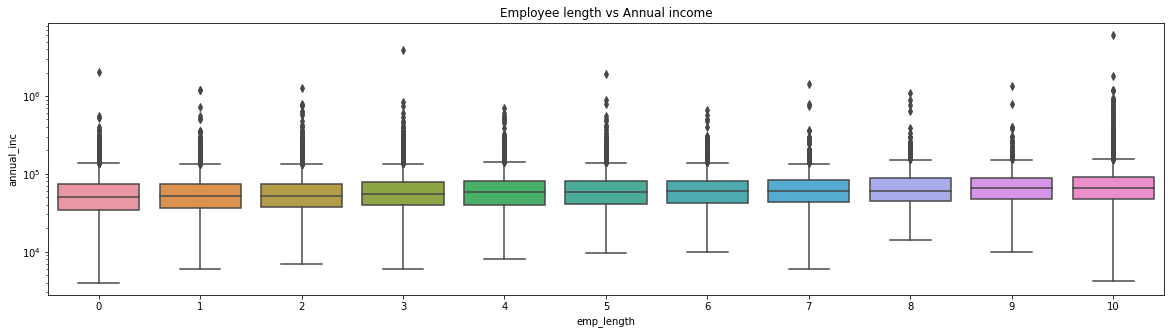

In [57]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_data.annual_inc, data=loan_data)
plt.title('Employee length vs Annual income')
plt.yscale('log')

#### The borrower's who has higer income have taken loans for 10+ years of duration.

#### Issue_d

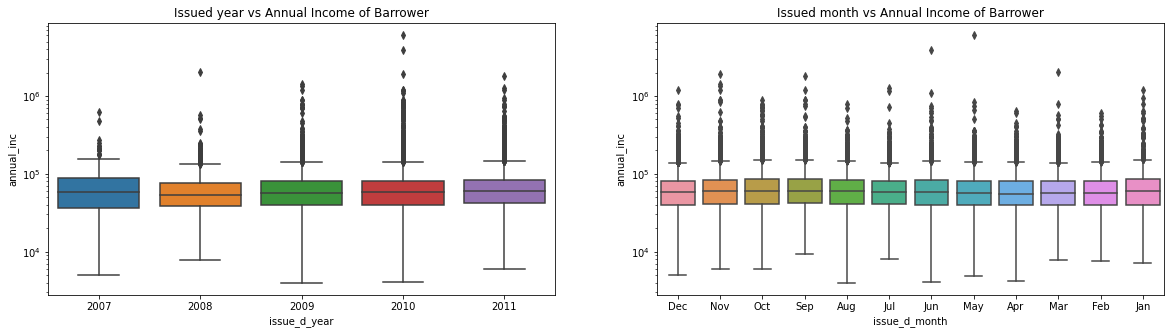

In [58]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan_data.issue_d_year, y=loan_data.annual_inc, data=loan_data)
plt.title('Issued year vs Annual Income of Barrower')
plt.yscale('log')
plt.subplot(122)
sns.boxplot(x=loan_data.issue_d_month, y=loan_data.annual_inc, data=loan_data)
plt.title('Issued month vs Annual Income of Barrower')
plt.yscale('log')
plt.show()

#### Annual income has no impact with the month when the loan was funded

## Bivariate Analysis

####  Annual income vs loan purpose

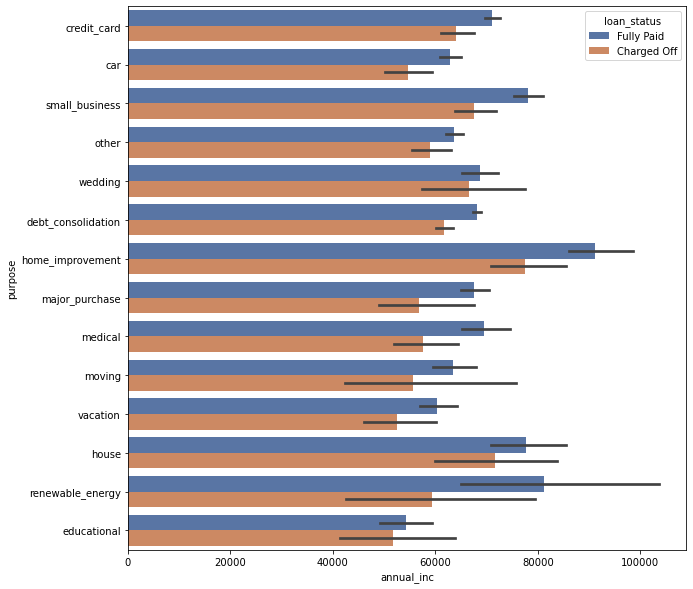

In [59]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

#### Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest.Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

#### Annual income vs home ownership

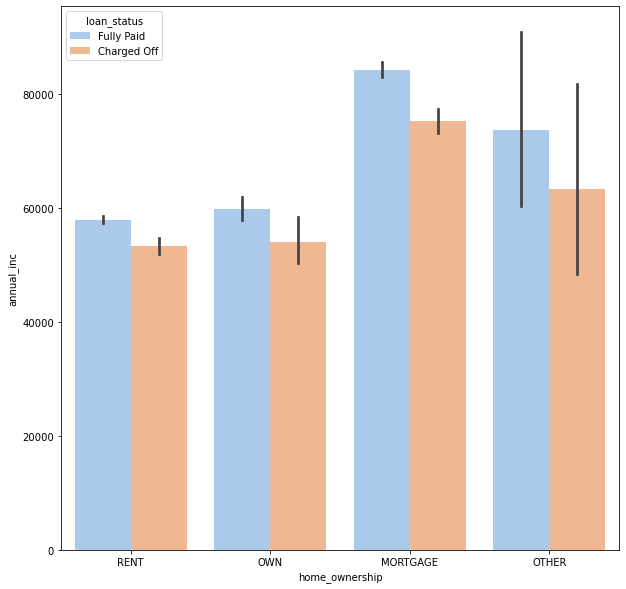

In [60]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

In [61]:
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

 #### Annual income vs int_rate

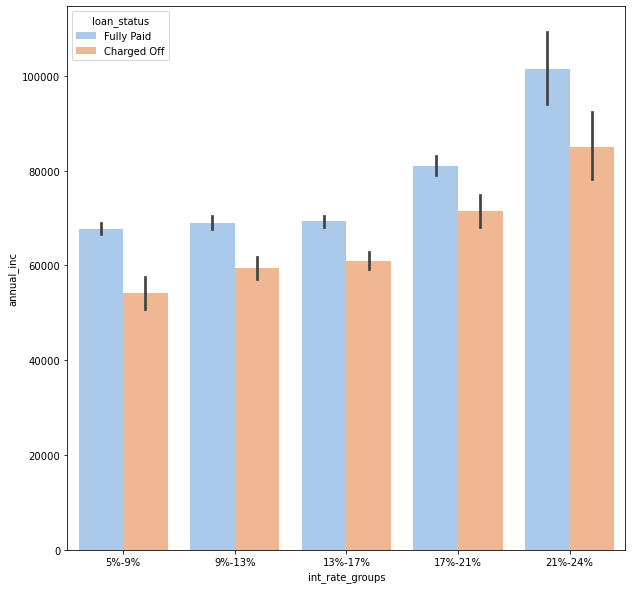

In [62]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

#### Loan Amount vs Interest Rate

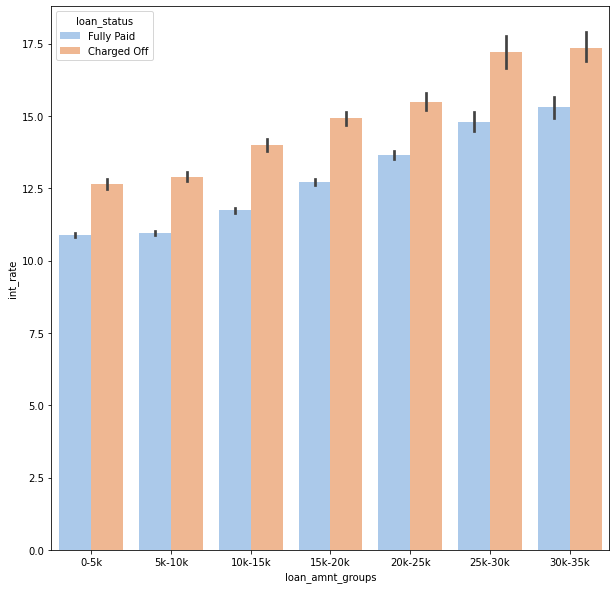

In [63]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

#### Loan vs Loan purpose

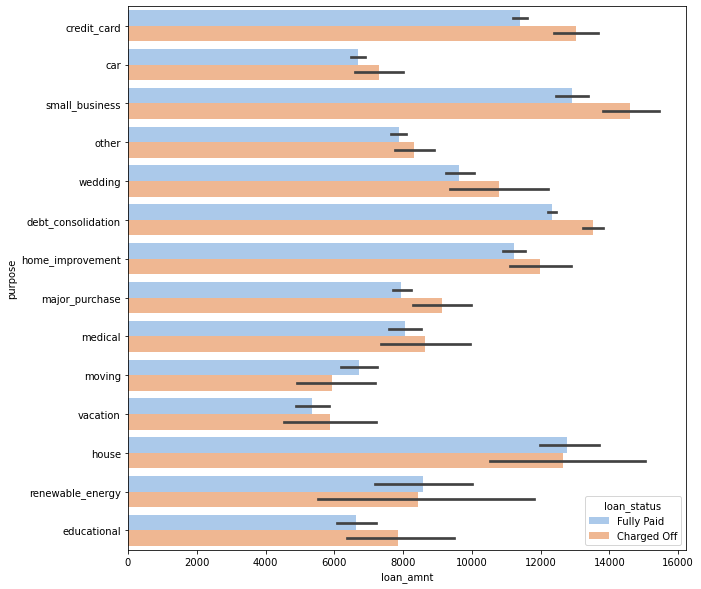

In [64]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

#### Loan vs House Ownership

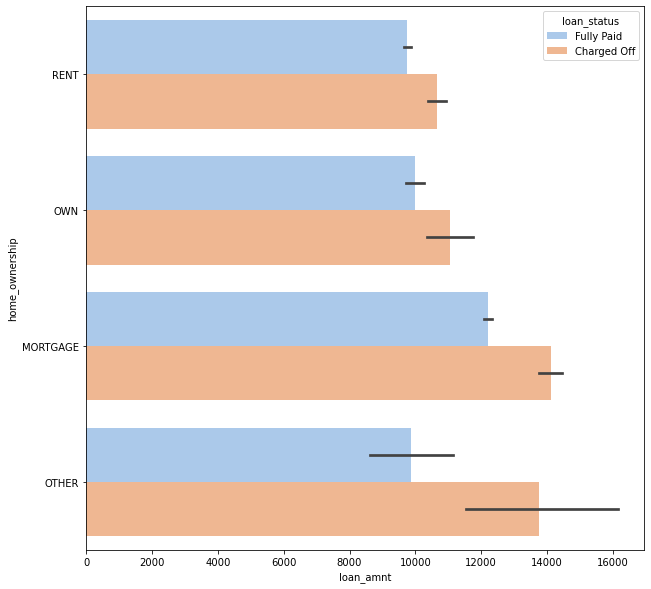

In [65]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

#### Loan amount vs Grade

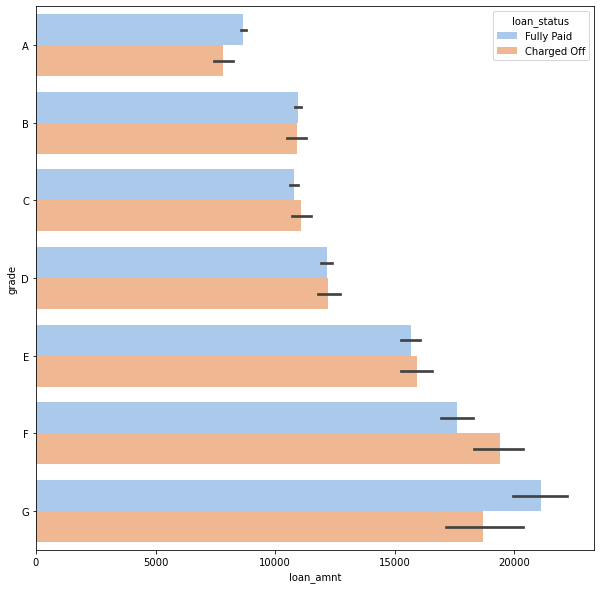

In [66]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

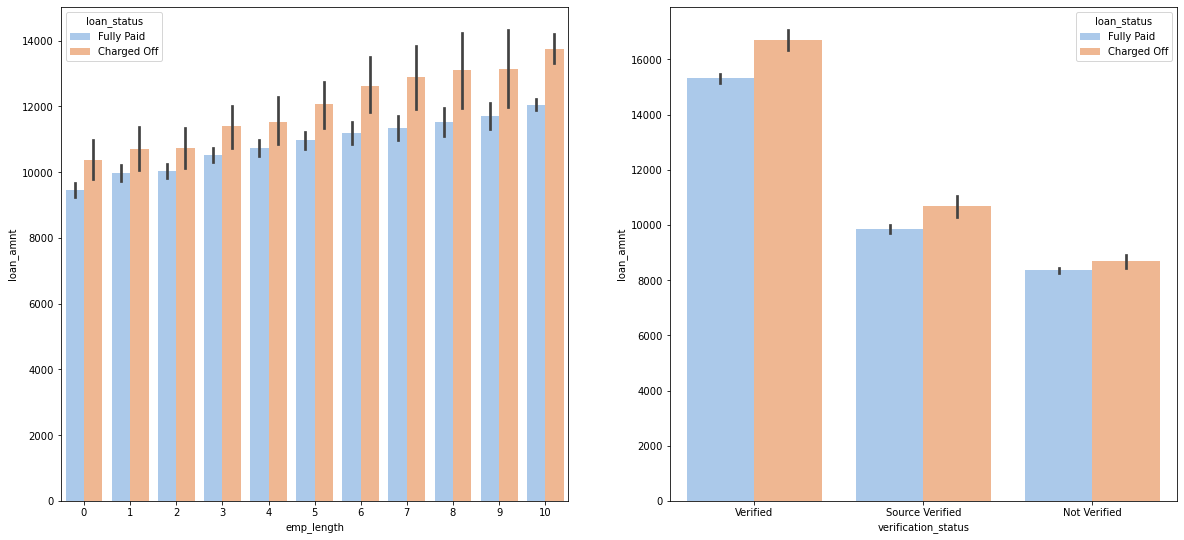

In [67]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan_data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

#### Employees with longer working history got the loan approved for a higher amount.Looking at the verification status data, verified loan applications tend to have higher loan amount. Which might indicate that the firms are first verifying the loans with higher values.

#### grade vs interest rate

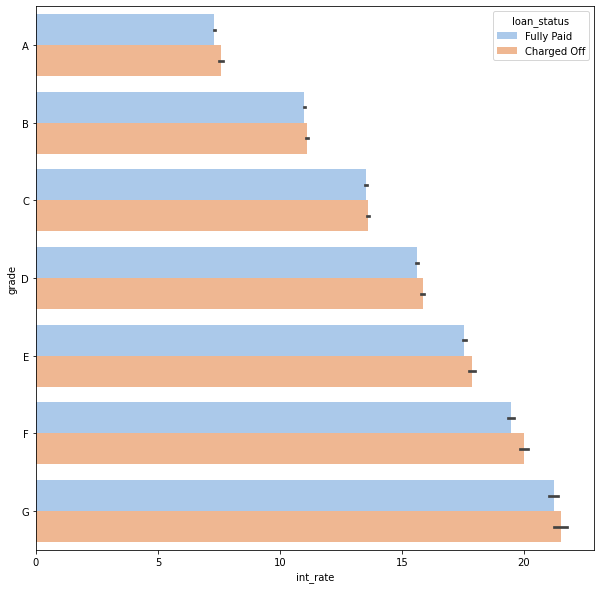

In [68]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 432x288 with 0 Axes>

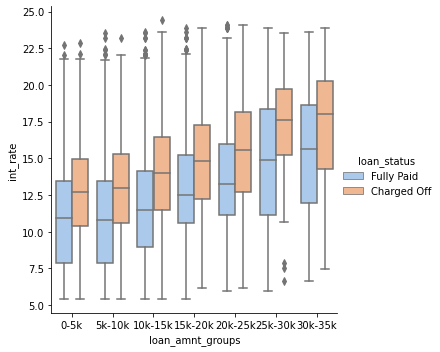

In [69]:
plt.tight_layout()
sns.catplot(data =loan_data,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

#### The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups.This can be a pretty strong driving factor for loan defaulting.

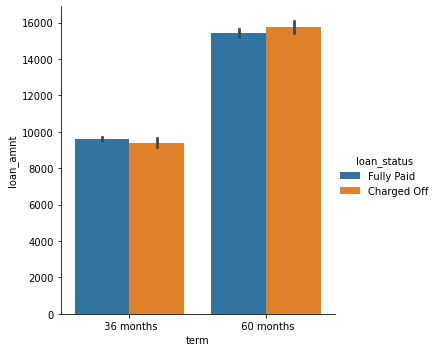

In [70]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_data,hue = 'loan_status', kind = 'bar')

#### Which means that applicants applying for long term has applied for more loan.

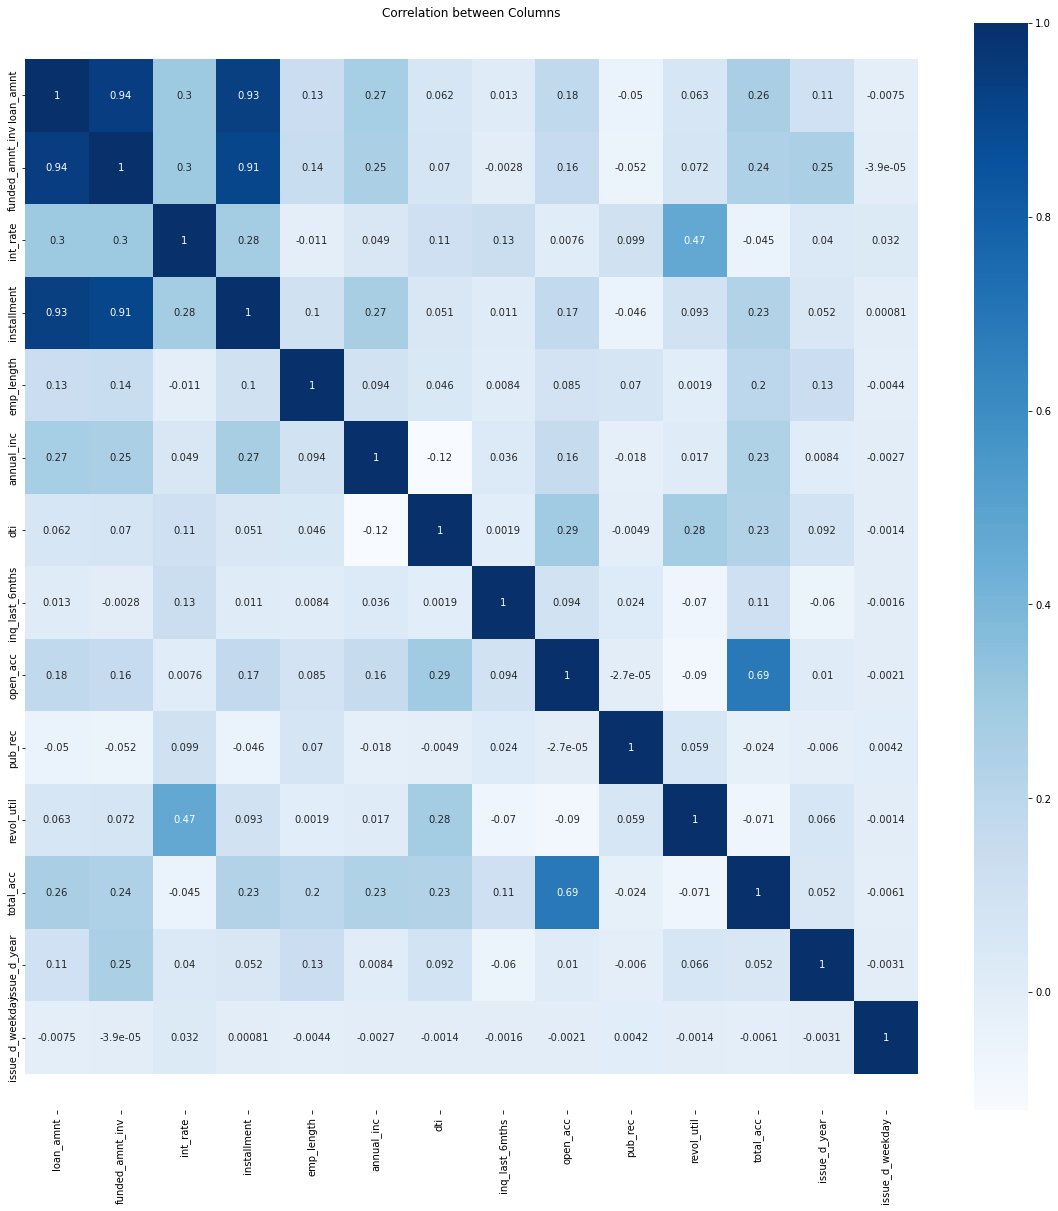

In [71]:
corr_matrix = loan_data.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

## Observations
## The above analysis with respect to the charged off loans. There is a more probability of defaulting when :
#### Applicants taking loan for 'home improvement' and have income of 60k -70k
#### Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
#### Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
#### Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
#### Applicants who have taken a loan for small business and the loan amount is greater than 14k
#### Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
#### When grade is F and loan amount is between 15k-20k
#### When employment length is 10yrs and loan amount is 12k-14k
#### When the loan is verified and loan amount is above 16k
#### For grade G and interest rate above 20%